# Project Name: EMAIL Fraud Detection system using Machine Learning


#### Project Type : Classification
#### Industry : Oasis Infobyte
#### Contribution : Individual
#### Member Name : Jatin Yadav


## Project Summary-

In today's digital world, the problem of dealing with spam emails has become increasingly urgent. Spam, or junk mail, floods our inboxes with unwanted and often harmful content, including everything from obscure messages to scams and phishing attempts. To tackle this challenge, we undertook an engaging data science internship project provided by Oasis Infobyte.

#### Project Highlight:

1. **Data Preprocessing:** Our Project began with preprocessing a large dataset of emails. This steps involved cleaning the data, addressing missing values, and transforming the text into a format suitable for machine learning models.

2. **Feature Extraction:** Next, we explore various feature extraction techniques to capture the key characterstics of spam emails. This was a vital step in preparing the data for the model training phase.

3. **Machine Learning Model:** We applied several machine learning algorithm, including decision trees and support vector machines, to train and assess the effectiveness of our spam detection model.

4. **Evaluation Metrics:** To evaluate the model's performance, we selected key metrics such as accuracy, precision, recall, and F1-score. These metrics provided us with a clear understanding of how well the model was performing.

5. **Tuning and Optimization:** Fine-tuning hyperparameters and optimizing the model were crucial to improving its predictive accuracy and overall effectiveness.

6. **Validation:** We conducted thorough cross-validation and tested the model on a separate validation dataset to ensure its ability to generalize to unseen data.

7. **Deployment:** Finally, we explored potential deployment strategies for the spam detection model, discussing how it could be applied in real-world scenarios like email filtering.

Completing this project not only honed our practical data science skills but also made a meaningful contribution to the ongoing fight against email spam. Its success highlighted the transformative potential of machine learning in tackling real-world problems.

#  GitHub Link

**GitHub Link:**

## Problem Statement

Email spam, or junk mail, continues to be a persistent problem, inundating inboxes with unwanted and often harmful content. These emails can include cryptic messages, scams, and, most concerning of all, phishing attempts. During an exciting data science internship offered by Oasis Infobyte, our challenge was to develop an effective spam detection system for emails using Python and machine learning techniques.

#### Project Objectives:

1. **Data Preprocessing:** Our project begins by preprocessing a large email dataset, which involves tasks such as cleaning the data, handling missing values, and transforming the text into a format suitable for machine learning.

2. **Email Feature Engineering:** Given the unique nature of email data, we focus on extracting meaningful features, such as the sender’s address, recipient list, subject line, and email body, to create valuable inputs for our spam detection model.

3. **Machine Learning Model Selection:** We aim to design and evaluate a robust spam detection model. To maximize its effectiveness, we experiment with a variety of machine learning algorithms, including decision trees, support vector machines, and neural networks.

4. **Model Evaluation:** To thoroughly assess the performance of our model, we use metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. These metrics provide a well-rounded understanding of the model’s performance and reliability.

5. **Hyperparameter Tuning:** The project involves fine-tuning model hyperparameters to optimize predictive accuracy and minimize false positives, which is especially crucial in the context of spam email detection.

6. **Cross-Validation and Generalization:** We apply rigorous cross-validation techniques and test the model on separate datasets to ensure its ability to generalize effectively to new, unseen email data.

7. **Practical Application:** We explore practical deployment strategies, considering how the spam detection model can be integrated into email filtering systems to enhance email security and improve user experience.

8. **Ethical Considerations:** The project also addresses ethical concerns regarding privacy and data security, ensuring that sensitive information such as email content and sender identities are handled with care.

9. **Challenges and Future Work:** We identify potential challenges in the field of email spam detection, including evolving tactics used by spammers, and propose directions for future research and improvements in this area.

This project encapsulates the power of machine learning in addressing real-world challenges and promises a future where spam emails will no longer plague our inboxes.

# *Let's begain!*

## ***1. Know Your Data***

### **Import Libraries**

In [5]:
# importing Numpy and pandas for data processing and data wrangling
import pandas as pd
import numpy as np

# importing tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
# Word cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import Model selection libraies
from sklearn.model_selection import train_test_split

# Library used for ML model Implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [20]:
# Load dataset from github repositorty

url = 'https://raw.github.com/Jatinyadav2183/Email-Fraund-Detection-system/main/spam.csv'

df = pd.read_csv(url , encoding='ISO-8859-1')

### Dataset First View

In [22]:
# view top 5 rows of dataset

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


 ### Dataset Raws and Columns count

In [24]:
# Checking number of rows and columns of the dataset using shape

print(" Number of rows are: ", df.shape[0])
print(" Number of columns are: ", df.shape[1])

 Number of rows are:  5572
 Number of columns are:  5


### Dataset Information

In [25]:
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Duplicate values

In [26]:
# missing values/ Null values count

df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Whay did I know about the dataset?


1. The Spam dataset contains various messages along with their corresponding categories.
   
2. It consists of 5 columns and 5,572 rows in total.

3. There are 403 duplicate rows in the dataset. 

4. While there are no null values in the v1 and v2 columns, the unnamed columns 2, 3, and 4 contain many null values, which we plan to drop later.

# ***2. Understanding The Variables***

In [27]:
# dataset columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [28]:
# Dataset Describe (all columns include)
df.describe(include='all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Check Unique values for each variable

In [30]:
# check unique values for each variable using a for loop

for i in df.columns.tolist():
    print(" No. of unique values in" , i , "is" ,df[i].nunique())

 No. of unique values in v1 is 2
 No. of unique values in v2 is 5169
 No. of unique values in Unnamed: 2 is 43
 No. of unique values in Unnamed: 3 is 10
 No. of unique values in Unnamed: 4 is 5


# ***3. Data Wrangling***

In [31]:
# Change the v1 and v2 columns as category and message

df.rename(columns={"v1" : "Category" , "v2" : "Message"}, inplace = True)

In [34]:
# Removing the all unnamed columns( its including much number of missing values)

df.drop(columns={'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'}, inplace=True)

In [35]:
# Create a binary 'spam' column: 1 fpr 'spam' and 0 for 'ham' based on the 'category' value

df['spam']= df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [36]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# ***4. Data Vizualization, Storytelling and experimenting with charts: Understand the relationships between variables***

#### Chart - 1: Distribution of Spam vs Ham

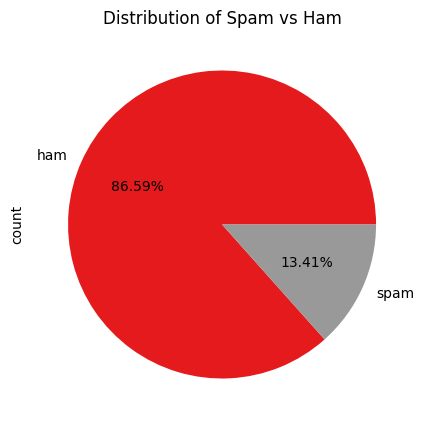

In [44]:
# Chart - 1 Pei Chart Visualization code

spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie' , autopct ='%1.2f%%', cmap = 'Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the chart
plt.show()

##### What are the insights found from the chart?

Based on the analysis of the chart, it is observed that the dataset comprises 13.41% spam messages and 86.59% ham messages.

#### Chart - 2: Most Used Words in Spam Message

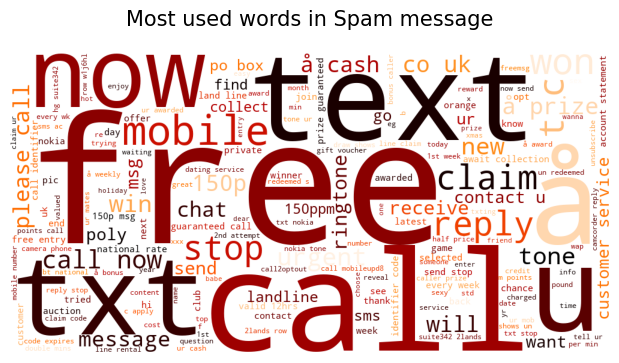

In [46]:
# Splitting spam message
df_spam = df[df['Category']== 'spam'].copy()

# Chart - 2 Wordcloud plot visulisation code for most used words in spam messages
# Create a string to store all the words

comment_words = ' '

# remove the Stopwords
stopwords = set(STOPWORDS)

# Iterate through the column
for val in df_spam.Message:
    val = str(val)
    tokens = val.split()

    # convert each token into language
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+ " "

# set parameters

wordcloud = WordCloud(width=1000 , height=500 ,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size= 10,
                      max_words=1000,
                      colormap='gist_heat_r').generate(comment_words)

# Set Labels

plt.figure(figsize=(6,6), facecolor=None)
plt.title('Most used words in Spam message', fontsize = 15, pad = 20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### What are insights found from the chart?

The word cloud plot above reveals that the most frequently used words in spam messages are 'free', 'call', 'text', 'txt', and 'now'.

# ***5. Feature Engineering and Data Pre-processing***

### Data Splitting

In [48]:
# Splitting the data to train and test

X_train, X_test, y_train,y_test = train_test_split(df.Message, df.spam, test_size = 0.25)

# ***6. ML Model Implementation***

In [73]:
def evaluate_model(model, X_train,X_test, y_train, y_test):
    ''' The function will take the following inputs: model, X_train, X_test, y_train, and 
    y_test. It will fit the model and then make predictions on the trained model. The 
    function will print the ROC-AUC scores for the training and testing datasets. It 
    will also plot the ROC and AUC curves, display the confusion matrix for 
    training and testing sets, and print the classification report. If the model has 
    feature importances, it will plot them as well. Finally, the function will return 
    the following scores as a list: recall_train, recall_test, accuracy_train, 
    accuracy_test, roc_auc_train, roc_auc_test, F1_train, and F1_test.
    '''

    # fit the model on the training data
    model.fit(X_train,y_train)

    # Make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[ :,1]
    pred_prob_test = model.predict_proba(X_test)[ :,1]

    #Calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC: ", roc_auc_train)
    print("Test ROC AUC: ", roc_auc_test)

    #plot the ROC Curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thrresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label = "Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test,tpr_test, label = "Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    #Calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'] , yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt = '.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'] , yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt = '.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    # Calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict = True)
    cr_test  = classification_report(y_test, y_pred_test, output_dict = True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())

    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true= y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred=y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train,F1_test]
    return model_score
    
    
    

    

#### ML Model: Multinomial Naive Bayes

In [74]:
# ML Model -1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization
# and a Multinomial Naive Bayes classifier for email spam detection

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Model is trained (fit) and predicted in the evaluate model


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart


Train ROC AUC:  0.979461856127354
Test ROC AUC:  0.9701254227130688


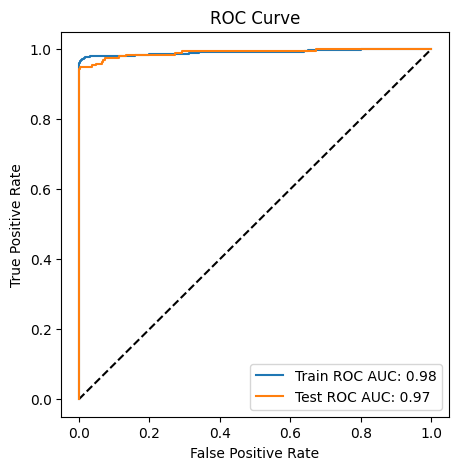


Confusion Matrix:


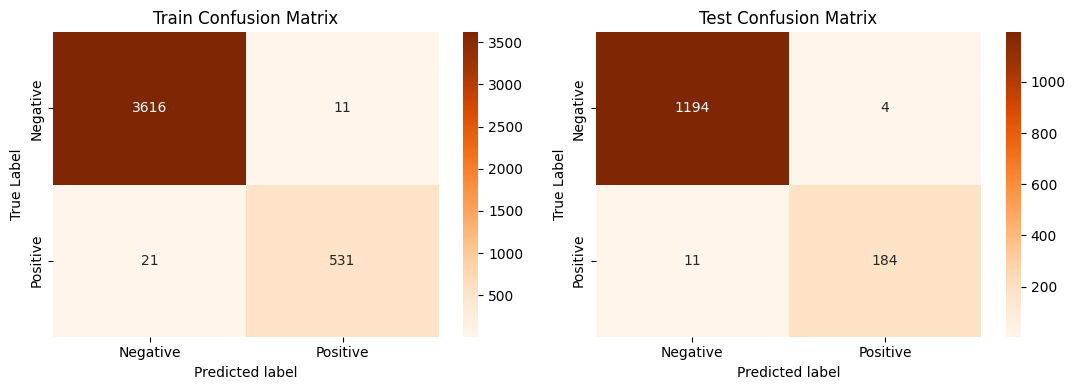


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.994226 | 0.996967 |   0.995595 | 3627        |
| 1            |    0.979705 | 0.961957 |   0.97075  |  552        |
| accuracy     |    0.992343 | 0.992343 |   0.992343 |    0.992343 |
| macro avg    |    0.986965 | 0.979462 |   0.983172 | 4179        |
| weighted avg |    0.992308 | 0.992343 |   0.992313 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.990871 | 0.996661 |   0.993758 | 1198        |
| 1            |    0.978723 | 0.94359  |   0.960836 |  195        |
| accuracy     |    0.989232 | 0.989232 |   0.989232 |    0.989232 |
| macro avg    |    0.984797 | 0.970125 |   0.977297 | 1393        |
| weighted avg |    0.989171 | 0.989232 |   

In [75]:
# Visualizing evaluation Metric Score Chart

MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

#### Which Evaluation metric did I consider for a positive business impact?

After thoroughly assessing the potential consequences of false positives and false negatives in relation to our business objectives, I have determined that recall should be the primary evaluation metric for our email spam detection model. This decision was made in consideration of the significant impact each type of error—false positives and false negatives—can have on our operations. Recall provides a more reliable measure of the model's ability to identify all relevant spam emails, which is critical to minimizing risks associated with missed spam. The model has demonstrated an impressive recall accuracy of 98.92% on the test set, reflecting its effectiveness in detecting the majority of spam emails.

# ***7. Email Spam Detection System***

In [76]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):

    # load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Make the prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a spam Email!"
        

In [94]:
# Example how to use this Email Spam Detection System

sample_email = 'Your course just got a new update!'
sample_email2 = 'Free Tickets for Icc World Cup 2023'
result1 = detect_spam(sample_email)
result2 = detect_spam(sample_email2)

print(result1)
print(result2)

This is a Ham Email!
This is a spam Email!


# ***8. Conclusion***

## Intake from this project 

In the realm of email communication, the battle against spam messages remains a persistent 
challenge. Our goal in this project was to develop a robust email spam detection system 
python and machine learning techniques. We aimed to create a tool that could effectively
distinguish between legitimate emails (ham) and unsolicited , often harmful, spam messages
, thereby enhancing user experience and security

## Key Insight:


1. Our dataset presented an interesting distribution, with approximately 13.41% of messages categorized as spam and the remaining 86.59% as ham. This distribution served as a foundational point for our analysis and model development.

2. During the exploratory data analysis (EDA) phase, we identified key keywords frequently associated with spam messages, such as 'free,' 'call,' 'text,' 'txt,' and 'now.' These words are often flagged by spam filters and were therefore considered important features for our machine learning model.

3. As we proceeded with model selection, we found that the Multinomial Naive Bayes model stood out due to its strong performance. This model achieved an outstanding 98.49% recall on the test set, highlighting its exceptional ability to accurately identify and filter out spam messages. Such performance is vital for improving email security and ensuring a better user experience by minimizing the intrusion of unwanted and potentially harmful emails.

## Conclusion

This project has clearly demonstrated the power of machine learning, combined with effective feature engineering and model selection, in addressing the ongoing issue of email spam. The implementation of this spam detection system marks a significant step toward reducing the impact of spam messages on email users.

With the successful deployment of our email spam detection system, email inboxes are now safer and more secure. As we conclude this phase of the project, we look forward to further improvements and innovations in email security, ensuring that we continue to stay one step ahead in the battle against spam.

Let us continue to keep our inboxes free of spam and our communications secure.